## PRL challenge

### Prepare distributions

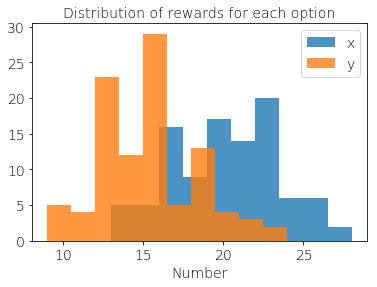

<function RandomState.binomial>

In [361]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up font
font = {
        'family' : 'Roboto',
        'weight' : 'light',
        'size'   : 14
        }

plt.rc('font', **font)
alpha = 0.8


# Draw samples from binomial distributions
n = 50
p1 = 0.4  # parameter of the first sample distribution
p2 = 0.3 # parameter of the second sample distribution
size = 100

x = np.array(np.random.binomial(n, p1, size))
y = np.array(np.random.binomial(n, p2, size))

# Plot reward distributions
plt.hist(x, alpha=alpha)
plt.hist(y, alpha=alpha)
plt.xlabel("Number", **font)
plt.legend(['x', 'y'])
plt.title("Distribution of rewards for each option", **font)#, fontdict=font)
plt.show()


## Generate a task

In [580]:
nblocks = 3
ntrials = 30

task = [] #np.zeros((nblocks * ntrials, 2))
dist = [x, y]
win = ["Left wins", "Right wins"]

j = 0
while j <= nblocks:
    toss = np.random.choice([0,1])
    print(f"Change: {win[toss]}")
    r = dist[toss]
    l = dist[1 - toss]
    for i in range(ntrials):
        values = [np.random.choice(r), np.random.choice(l)]
        task.append(values)
        print(values)
    j += 1

Change: Left wins
[13, 15]
[21, 24]
[23, 24]
[19, 12]
[16, 15]
[16, 15]
[15, 13]
[17, 13]
[25, 15]
[23, 21]
[22, 13]
[23, 11]
[22, 17]
[23, 13]
[16, 19]
[17, 13]
[22, 16]
[18, 18]
[19, 13]
[22, 9]
[16, 12]
[23, 18]
[18, 11]
[24, 19]
[23, 13]
[21, 19]
[17, 17]
[25, 14]
[21, 15]
[23, 16]
Change: Right wins
[14, 22]
[18, 19]
[16, 18]
[14, 18]
[10, 24]
[16, 21]
[13, 21]
[18, 18]
[23, 27]
[14, 23]
[13, 23]
[15, 21]
[13, 18]
[23, 13]
[15, 20]
[13, 21]
[19, 19]
[16, 14]
[16, 21]
[21, 25]
[17, 19]
[13, 20]
[10, 24]
[14, 21]
[10, 21]
[14, 18]
[13, 17]
[14, 14]
[13, 24]
[14, 19]
Change: Right wins
[14, 22]
[14, 19]
[16, 17]
[15, 23]
[17, 21]
[13, 15]
[12, 25]
[19, 25]
[12, 23]
[23, 15]
[15, 22]
[13, 23]
[12, 14]
[13, 17]
[21, 24]
[14, 22]
[12, 15]
[14, 21]
[17, 17]
[12, 19]
[13, 21]
[9, 14]
[13, 21]
[15, 23]
[17, 20]
[14, 25]
[13, 15]
[14, 13]
[16, 15]
[20, 21]
Change: Right wins
[13, 21]
[9, 20]
[20, 20]
[12, 16]
[15, 25]
[21, 23]
[16, 15]
[15, 17]
[15, 19]
[14, 21]
[20, 23]
[21, 16]
[12, 21]
[

## What’s ‘Q’?

The ‘$q$’ in $q$-learning stands for *quality*. Quality in this case represents how useful a given action is in gaining some future reward.

## Create a q-table
When q-learning is performed we create what’s called a q-table or matrix that follows the shape of `[state, action]` and we initialize our values to zero. We then update and store our *q-values* after an episode. This q-table becomes a reference table for our agent to select the best action based on the q-value.

## Q-learning and making updates
The next step is simply for the agent to interact with the environment and make updates to the state action pairs in our q-table `Q[state, action]`.

### Taking Action: Explore or Exploit
An agent interacts with the environment in 1 of 2 ways. The first is to use the q-table as a reference and view all possible actions for a given state. The agent then selects the action based on the max value of those actions. This is known as *exploiting* since we use the information we have available to us to make a decision.

The second way to take action is to act randomly. This is called *exploring*. Instead of selecting actions based on the max future reward we select an action at random. Acting randomly is important because it allows the agent to explore and discover new states that otherwise may not be selected during the exploitation process. You can balance exploration/exploitation using epsilon ($\epsilon$) and setting the value of how often you want to explore vs exploit. Here’s some rough code that will depend on how the state and action space are setup.

## Updating the q-table
The updates occur after each step or action and ends when an episode is done. Done in this case means reaching some terminal point by the agent. 
A terminal state for example can be anything like landing on a checkout page, reaching the end of some game, completing some desired objective, etc. 
The agent will not learn much after a single episode, but eventually with enough exploring (steps and episodes) it will converge and learn the optimal q-values or q-star (Q∗).

Here are the 3 basic steps:
1. Agent starts in a state (s1) takes an action (a1) and receives a reward (r1)
2. Agent selects action by referencing Q-table with highest value (max) OR by random (epsilon, ε)
3. Update q-values

Here is the basic update rule for q-learning:

$NewEstimate \leftarrow OldEstimate + StepSize[Target - OldEstimate]$


In [581]:
# Create q-table

Q = np.ones(np.array(task).shape)*30

choices = []
cum_account = []
winners = []
lr = 0.3
account = 0  

# Update Q value
for state in range(0, len(Q)-1):
    print("============================================")
    print(f"State: {state + 1}")
    
    # Get action values from distributions
    #options = [np.random.choice(x), np.random.choice(y)]
    options = task[state]
    winner = np.argmax(options)
    winners.append(winner)
      
    # For first state make select random action
    if state == 0:
        action = np.random.choice([0,1])
    # For every consecutive state select action with max Q value based on previous rewards  
    else:
        action = np.argmax(Q[state])
    choices.append(action)
    
    print(f"Selected action: {action}")
    print(f"Options: {options}")

    value = options[action]
    print(f"Value of selected action: {value}")
    
    # How much you've won?    
    if action == winner:
        reward = value
    else:
        reward = 0
        
    account += reward
    cum_account.append(account)
    print(f"Reward: {reward}")
    print(f"Account balance: {account}")
    
    
    # Update Q table
    Q[state+1, action] = Q[state, action] + lr*(reward - Q[state, action])
    Q[state+1, 1-action] = Q[state, 1-action]
    
    print(f"Updated table: {Q[state+1]}")
    


State: 1
Selected action: 1
Options: [13, 15]
Value of selected action: 15
Reward: 15
Account balance: 15
Updated table: [30.  25.5]
State: 2
Selected action: 0
Options: [21, 24]
Value of selected action: 21
Reward: 0
Account balance: 15
Updated table: [21.  25.5]
State: 3
Selected action: 1
Options: [23, 24]
Value of selected action: 24
Reward: 24
Account balance: 39
Updated table: [21.   25.05]
State: 4
Selected action: 1
Options: [19, 12]
Value of selected action: 12
Reward: 0
Account balance: 39
Updated table: [21.    17.535]
State: 5
Selected action: 0
Options: [16, 15]
Value of selected action: 16
Reward: 16
Account balance: 55
Updated table: [19.5   17.535]
State: 6
Selected action: 0
Options: [16, 15]
Value of selected action: 16
Reward: 16
Account balance: 71
Updated table: [18.45  17.535]
State: 7
Selected action: 0
Options: [15, 13]
Value of selected action: 15
Reward: 15
Account balance: 86
Updated table: [17.415 17.535]
State: 8
Selected action: 1
Options: [17, 13]
Value o

/home/finc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/finc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/finc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


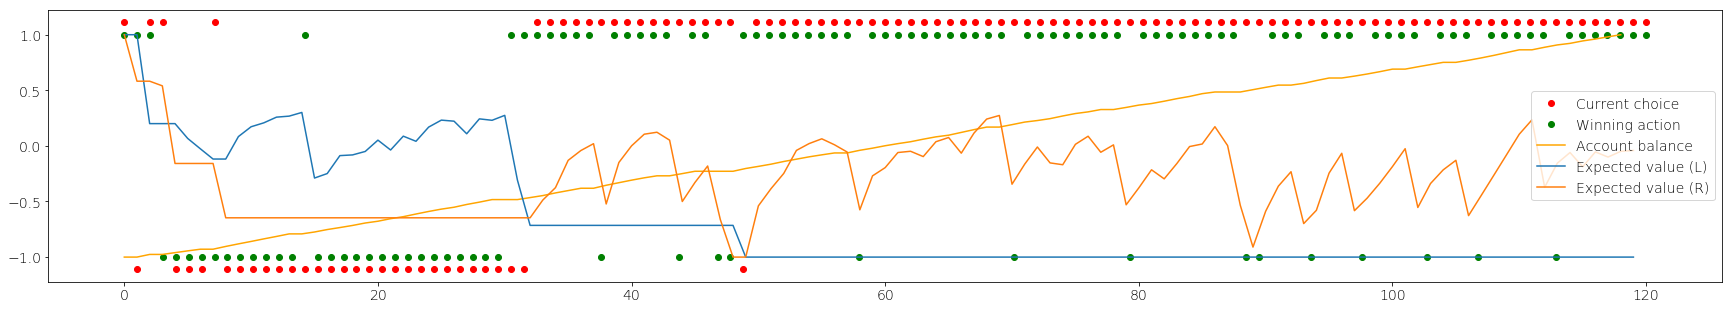

In [585]:
task_len = np.array(task).shape[0]

def min_max_scale(vector):
    from sklearn import preprocessing
    return preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(np.array(vector).reshape(-1, 1))

fig, ax = plt.subplots(1,1, figsize = (30, 5))

ax.plot(np.linspace(0,task_len,task_len-1), min_max_scale(choices)/0.9, "o", color = "red")
ax.plot(np.linspace(0,task_len,task_len-1), min_max_scale(winners), "o", color = "green")
ax.plot(min_max_scale(cum_account), color = "orange")
ax.plot(min_max_scale(Q[:,0]))
ax.plot(min_max_scale(Q[:,1]))
ax.legend(["Current choice", "Winning action", "Account balance", "Expected value (L)", "Expected value (R)"])